In [1]:
import numpy as np
import matplotlib.pyplot as plt

noise = np.array([-1,1]*50)*0.2


In [2]:
x = np.linspace(0,1,100)
Amplitude = 0.3
Frequency = 5
Phase = 0
# We compute the sinusoidal function
y = Amplitude*np.sin(x*2*np.pi*Frequency+Phase)
y[20:30] = y[20:30]*3
y[60:70] = y[60:70]*4

In [3]:
x2 = np.linspace(0,1,100)
Amplitude2 = 0.1
Frequency2 = 15
Phase2 = 0
# We compute the sinusoidal function
y2 = Amplitude*np.sin(x2*2*np.pi*Frequency2+Phase2)


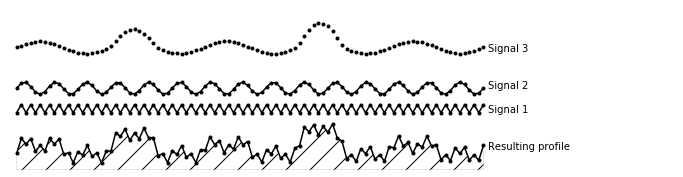

In [6]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111,)
plt.rcParams['svg.fonttype'] = 'none'
mean, sigma = 2, 0.5 # mean and standard deviation
points = 300
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_ylim(-1,7)
ax.set_xlim(-2,140)
tot_prof = noise+y+y2
ax.plot(tot_prof,'.',linestyle='-',color='k')
ax.fill_between(range(len(tot_prof)), -1, tot_prof, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)
ax.plot(noise + 2,'.',linestyle='-',color='k')
ax.plot(y2 + 3,'.',linestyle='-',color='k')
ax.plot(y +5,'.',color='k')

ax.text(s='Resulting profile',x=100,y=0,ha='left')
ax.text(s='Signal 1',x=100,y=1.8,ha='left')
ax.text(s='Signal 2',x=100,y=3,ha='left')
ax.text(s='Signal 3',x=100,y=4.8,ha='left')
fig.savefig("Signals.svg")

In [212]:
def get_peaksvalleys(profile):
    nanindex = np.argwhere(~np.isnan(profile)).flatten()
    len_P = len(profile)
    if len(nanindex) != len_P:
        orig_profile = np.array(profile).copy()
        profile = np.array(profile)[nanindex]
    levels_max = [np.nan]
    levels_min = [np.nan]
    for idx,m in enumerate(profile[1:-1]):
        if m > profile[idx] and m > profile[idx+2]:
            levels_max.append(m)
        else:
            levels_max.append(np.nan)
        if m < profile[idx] and m < profile[idx+2]:
            levels_min.append(m)
        else:
            levels_min.append(np.nan)
    levels_max.append(np.nan)
    levels_min.append(np.nan)
    if len(nanindex) != len_P:
        orig_profile[nanindex] = levels_max
        levels_max = orig_profile.copy()
        orig_profile[nanindex] = levels_min
        levels_min = orig_profile
    return levels_max,levels_min
levels_max,levels_min = get_peaksvalleys(tot_prof)
levels_max2,levels_min = get_peaksvalleys(levels_max)
levels_max3,levels_min = get_peaksvalleys(levels_max2)
levels_max4,levels_min = get_peaksvalleys(levels_max3)

In [213]:
def valids(tot_prof,levels_max):
    g = np.ma.masked_invalid(np.array(levels_max))
    x = np.arange(len(tot_prof))[~g.mask]
    y = np.array(levels_max)[~g.mask]
    return x,y

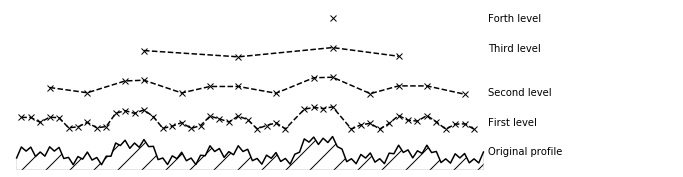

In [214]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111,)
plt.rcParams['svg.fonttype'] = 'none'
mean, sigma = 2, 0.5 # mean and standard deviation
points = 300



ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_ylim(-1,10)
ax.set_xlim(-2,140)

ax.plot(range(len(tot_prof)),tot_prof,color='k')
ax.fill_between(range(len(tot_prof)), -1, tot_prof, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)
x,y = valids(tot_prof,levels_max)
ax.plot(x,y+2,marker='x',linestyle='--',color='k')
x1,y1 = valids(tot_prof,levels_max2)
ax.plot(x1,y1+4,marker='x',linestyle='--',color='k')
x2,y2 = valids(tot_prof,levels_max3)
ax.plot(x2,y2+6,marker='x',linestyle='--',color='k')
x3,y3 = valids(tot_prof,levels_max4)
ax.plot(x3,y3+8,marker='x',linestyle='--',color='k')
ax.text(s='Original profile',x=100,y=0,ha='left')
ax.text(s='First level',x=100,y=2,ha='left')
ax.text(s='Second level',x=100,y=4,ha='left')
ax.text(s='Third level',x=100,y=7,ha='left')
ax.text(s='Forth level',x=100,y=9,ha='left')
fig.savefig("HPVA_2D.svg")

In [196]:
g = np.ma.masked_invalid(np.array(levels_max))

In [74]:
5 < np.nan

False

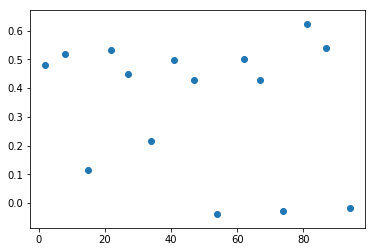

In [70]:
plt.scatter(range(len(g)), g)

In [66]:
def findpeaks(profile,pindexes=None):
    indx = []
    heights = []
    tot_profile = np.array(profile)
    z = 0
    if pindexes is not None:
        z = -1
    arr = np.concatenate(([tot_profile[0]+z],tot_profile,[tot_profile[-1]+z]))
    for ix,h in enumerate(arr[1:-1]):
        if h > arr[ix] and h > arr[ix+2]:
            heights.append(h)
            indx.append(ix+1)
    indx = np.array(indx)
    if pindexes is not None: 
        indx = pindexes[indx-1]
    return indx, np.array(heights)

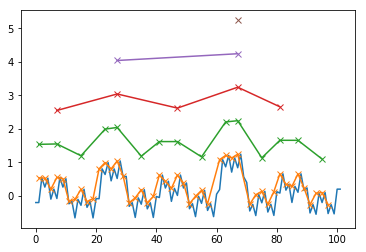

In [74]:
plt.plot(arr)
indx1,heights1 = findpeaks(tot_profile)
plt.plot(indx1-1,heights1,marker='x')
indx2,heights2 = findpeaks(heights1,indx1)
plt.plot(indx2-1,heights2+1,marker='x')
indx3,heights3 = findpeaks(heights2,indx2)
plt.plot(indx3-1,heights3+2,marker='x')
indx4,heights4 = findpeaks(heights3,indx3)
plt.plot(indx4-1,heights4+3,marker='x')
indx5,heights5 = findpeaks(heights4,indx4)
plt.plot(indx5-1,heights5+4,marker='x')

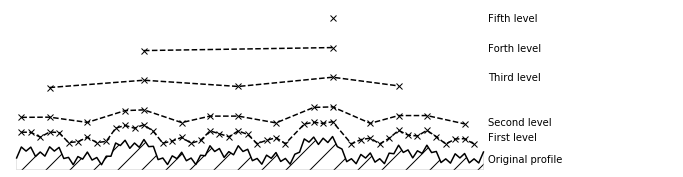

In [85]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111,)
plt.rcParams['svg.fonttype'] = 'none'
mean, sigma = 2, 0.5 # mean and standard deviation
points = 300



ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_ylim(-1,10)
ax.set_xlim(-2,140)

ax.plot(range(len(tot_prof)),tot_prof,color='k')
ax.fill_between(range(len(tot_prof)), -1, tot_prof, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)
ax.plot(indx1-1,heights1+1,marker='x',linestyle='--',color='k')
ax.plot(indx2-1,heights2+2,marker='x',linestyle='--',color='k')
ax.plot(indx3-1,heights3+4,marker='x',linestyle='--',color='k')
ax.plot(indx4-1,heights4+6,marker='x',linestyle='--',color='k')
ax.plot(indx5-1,heights5+8,marker='x',linestyle='--',color='k')
ax.text(s='Original profile',x=100,y=-0.5,ha='left')
ax.text(s='First level',x=100,y=1,ha='left')
ax.text(s='Second level',x=100,y=2,ha='left')
ax.text(s='Third level',x=100,y=5,ha='left')
ax.text(s='Forth level',x=100,y=7,ha='left')
ax.text(s='Fifth level',x=100,y=9,ha='left')
fig.savefig("HPVA_2D_b.svg")

In [42]:
np.concatenate(([3],np.array([1,2,3]),[4]))

array([3, 1, 2, 3, 4])

Test